# From plotting to "chart-porn": Creating slick charts with Matplotlib

### PyCon Israel 2017


Tamir Lousky, B.Sc

Download this notebook and related data and stylesheets at:
https://github.com/Tlousky/pyconil_2017

In [2]:
# Libraries, imports and settings
%matplotlib inline
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from sklearn import datasets
from os.path import isfile

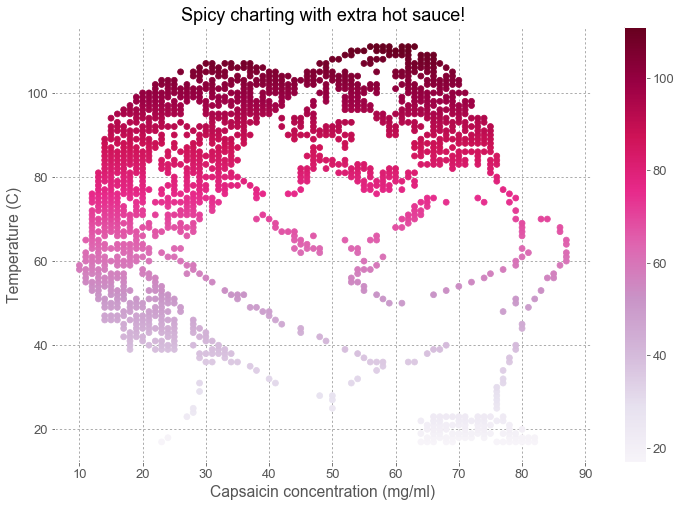

In [3]:
# Demo code for first spicy chart - let's ignore it for now, we'll discuss these techinques in detail later
style.use('ggplot_pp.mplstyle')
f, ax = plt.subplots( figsize = (12,8) )

df = pd.read_csv( 'spicy.csv' )
cm = plt.cm.get_cmap('PuRd')

sc = ax.scatter( df.x, df.y, c = df.y, vmin = min( df.y ), vmax = max( df.y ), s = 35, cmap = cm )
ax.set( ylabel   = "Temperature (C)", xlabel   = "Capsaicin concentration (mg/ml)" )
ax.set_title( 'Spicy charting with extra hot sauce!', fontsize = 18 )

plt.colorbar( sc )

plt.show()

## Data preparation

To visualize stuff we first need to have some data. In the following examples we'll use a combination of random generated data, and well known datasets such as the Iris machine learning dataset.

In [4]:
# Based on: http://stackoverflow.com/a/38105540/3104151

# save load_iris() sklearn dataset to iris
iris = datasets.load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
irisDF = pd.DataFrame(
    data    = np.c_[ iris['data'], iris['target'] ],
    columns = iris['feature_names'] + ['target']
)

# Rename columns for clarity and ease of use
newNames = [ 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species' ]
irisDF.rename( 
    columns = { oldName : newName for oldName, newName in zip( irisDF.columns, newNames ) },
    inplace = True 
)

# Replace species indices with species names
Species = [ 'Iris setosa', 'Iris versicolour', 'Iris virginica' ]
irisDF.Species = [ Species[int(i)] for i in irisDF.Species ]

# Iris flower anatomy
!['Iris'](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

## Styles

### What are styles?
Styles are collections of plot design parameters, such as fonts, gridlines, line width, background color, etc.

Matplotlib provides a list of style presets, and if you have a really good eye for slick design, you can also define your own style and use it. WARNING: most developers tend to be pretty bad at design, so it might be safer to use one of the existing presets :-P

In [6]:
# Available style presets
print( style.available )

['seaborn', 'seaborn-bright', 'seaborn-dark', 'dark_background', 'seaborn-muted', 'grayscale', 'seaborn-darkgrid', 'seaborn-talk', 'seaborn-white', 'bmh', 'ggplot', 'fivethirtyeight', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn-ticks', 'seaborn-pastel', 'seaborn-colorblind', 'seaborn-whitegrid', 'classic', 'seaborn-deep', 'seaborn-notebook']


### How to use a style? Simple:
### `style.use( styleName )`

In [7]:
def testStyle( styleType = None, file = False ):
    ''' Draw 6 charts using the Iris dataset and some random data,
    using the provided styleType (or the default style of no valid style is provided)
    '''
  
    # Set style if received a valid style name or filepath otherwise reset to default
    if styleType and ( styleType in style.available or ( file and isfile( styleType ) ) ):
        style.use( styleType )
    else:
        mpl.rcParams.update( mpl.rcParamsDefault )
    
    # Generate a figure with 3X3 plots
    f, ax = plt.subplots( 3, 2, figsize = (16,18) )
    ax = ax.flat # Flatten axis matrix to 1D flat array of axis objects

    # Chart 1: Histogram of Sepal Length
    ax[0].hist( irisDF.SepalLength )
    ax[0].set( title = 'Iris Sepal Length Histogram', ylabel = 'Frequency', xlabel = 'Sepal Length' )
    
    # Chart 2: Plotting all 4 features as line charts
    x = np.arange( len( irisDF ) )
    ax[1].plot( x, irisDF.SepalLength, label = "Sepal Length" )
    ax[1].plot( x, irisDF.SepalWidth,  label = "Sepal Width"  )
    ax[1].plot( x, irisDF.PetalLength, label = "Petal Length" )
    ax[1].plot( x, irisDF.PetalWidth,  label = "Petal Width"  )
    ax[1].set( title = "Iris features", ylabel = "CM" )
    ax[1].legend()
    
    # Chart 3: Bar plot of Sepal Length by species
    meanSpealLengthPerSpecies = irisDF.groupby('Species').agg({ 'SepalLength' : 'mean' })
    x  = meanSpealLengthPerSpecies.index
    y  = meanSpealLengthPerSpecies.SepalLength
    xi = list( range( len( x ) ) )
    ax[2].bar( xi, y )
    ax[2].set_xticks( xi )
    ax[2].set_xticklabels( x )
    ax[2].set_title( "Mean Sepal Length by Species" )
    
    # Chart 4: Boxplot of Petal Length by species
    x = irisDF.Species.unique()
    y = [ irisDF[ irisDF.Species == xi ].PetalLength for xi in x ]
    ax[3].boxplot( y, labels = x, patch_artist = True )
    ax[3].set( title = 'Petal Length by Species' )
    
    # Chart 5: Scatter plot of Petal length by petal width
    ax[4].scatter( irisDF.PetalLength, irisDF.PetalWidth )
    ax[4].set( title = "Iris Petal Length vs. Width", xlabel = 'Petal Length', ylabel = 'Petal Width' )
    
    # Chart 6: Random Image
    img = np.random.random( ( 100, 100 ) )
    ax[5].imshow( img )
    ax[5].set_title( "Random Image" )
   
    plt.tight_layout()
    plt.show()

### My personal favorites: ggplot and fivethirtyeight
Let's compare them with the default matplotlib style. The examples below use some techniques for subplotting that we'll discuss later, you can just ignore it and only use the function to test styles for now.

Default style


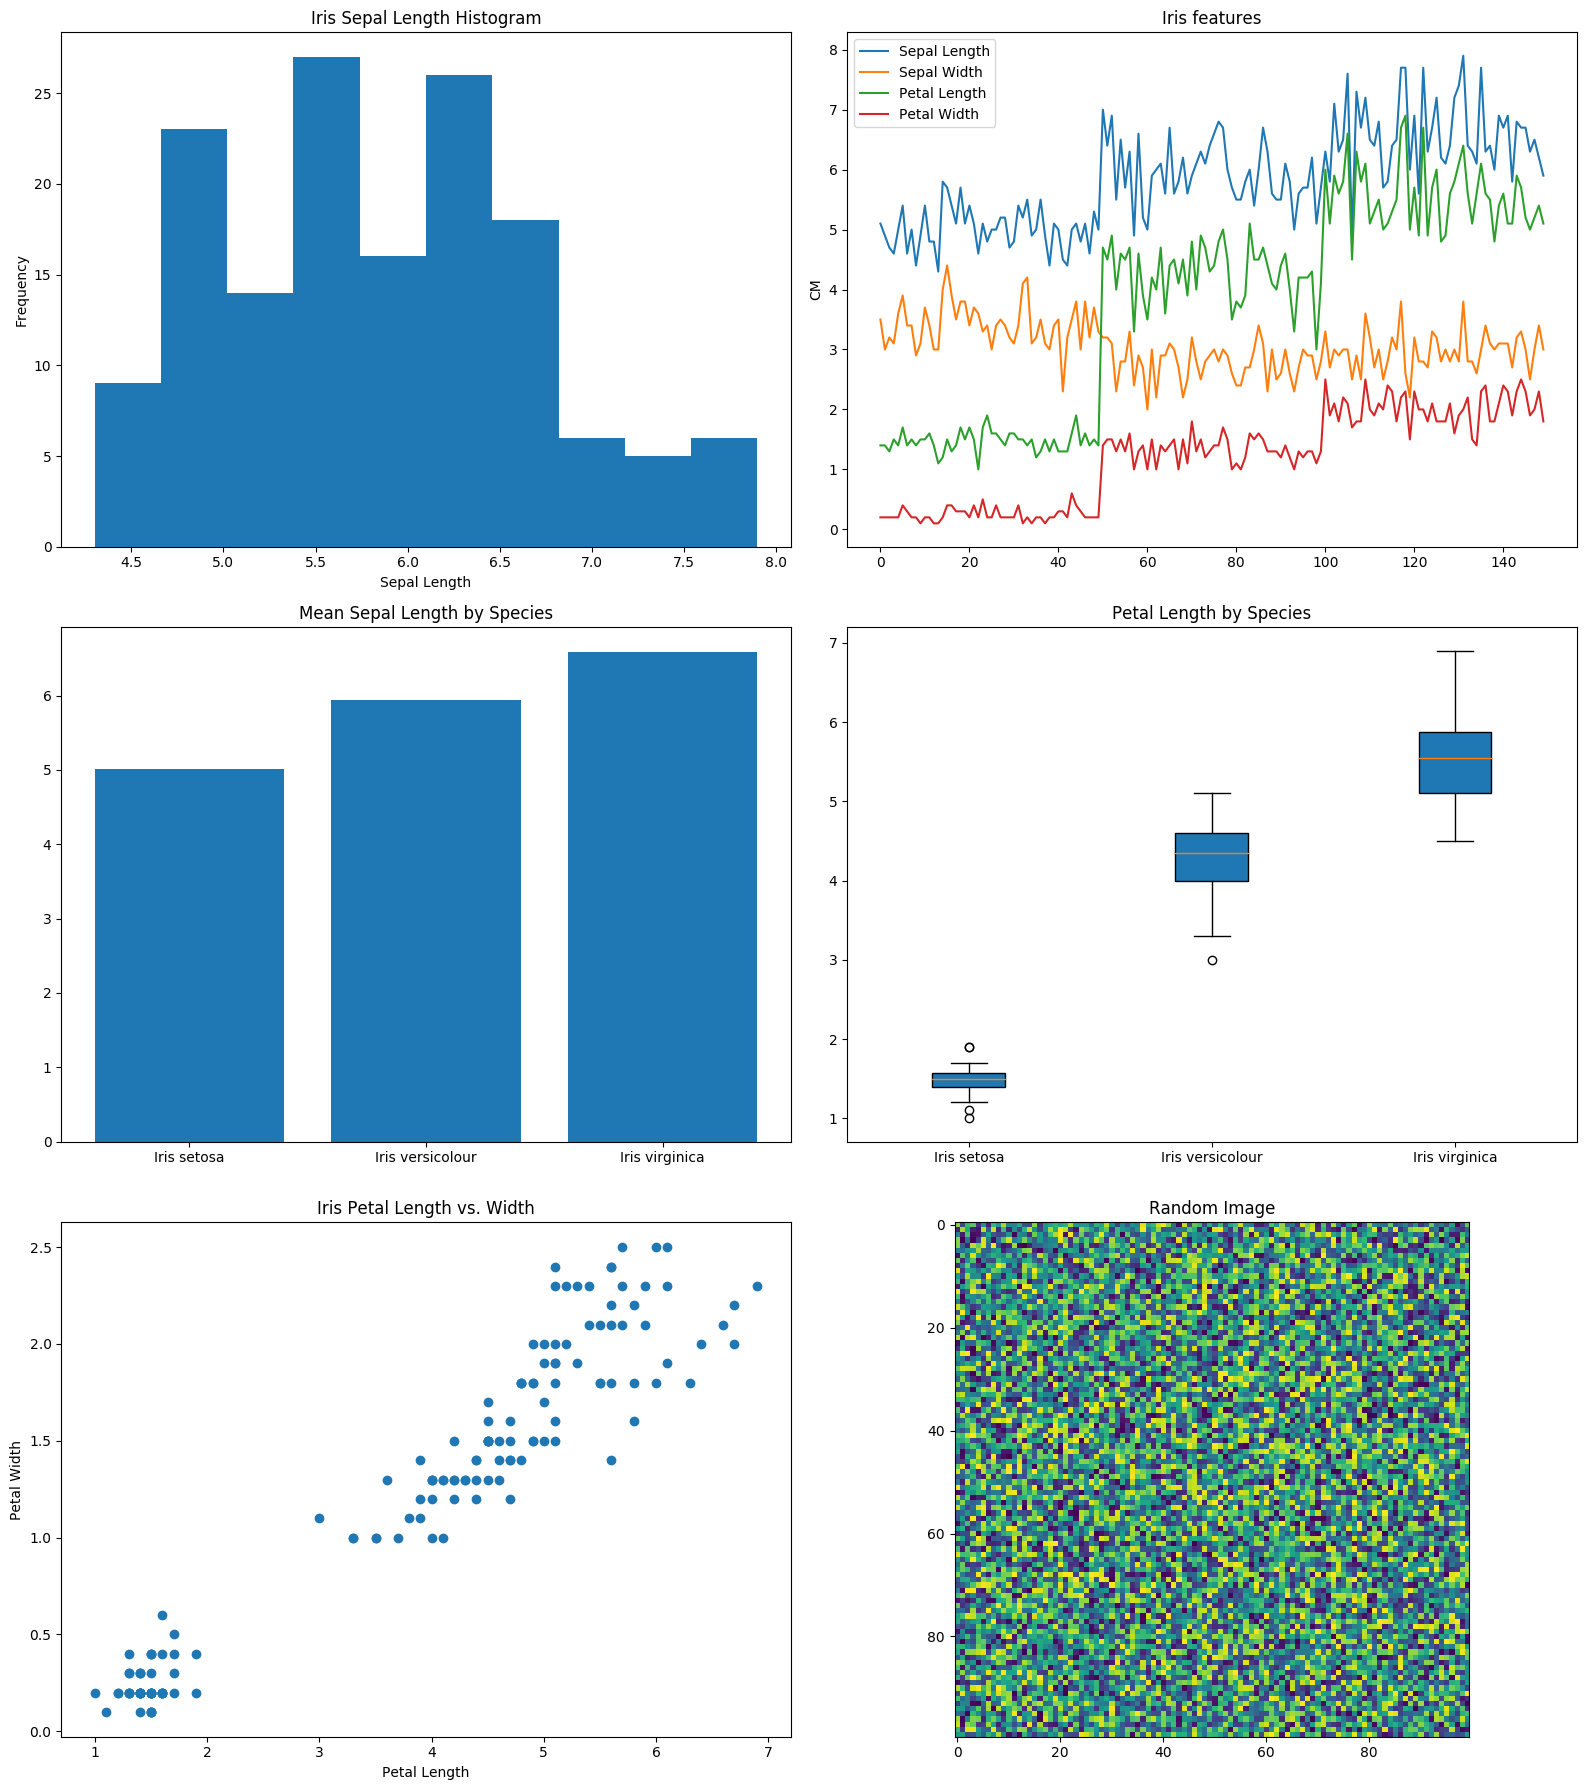

In [8]:
print( "Default style" )
testStyle( styleType = None )

ggplot


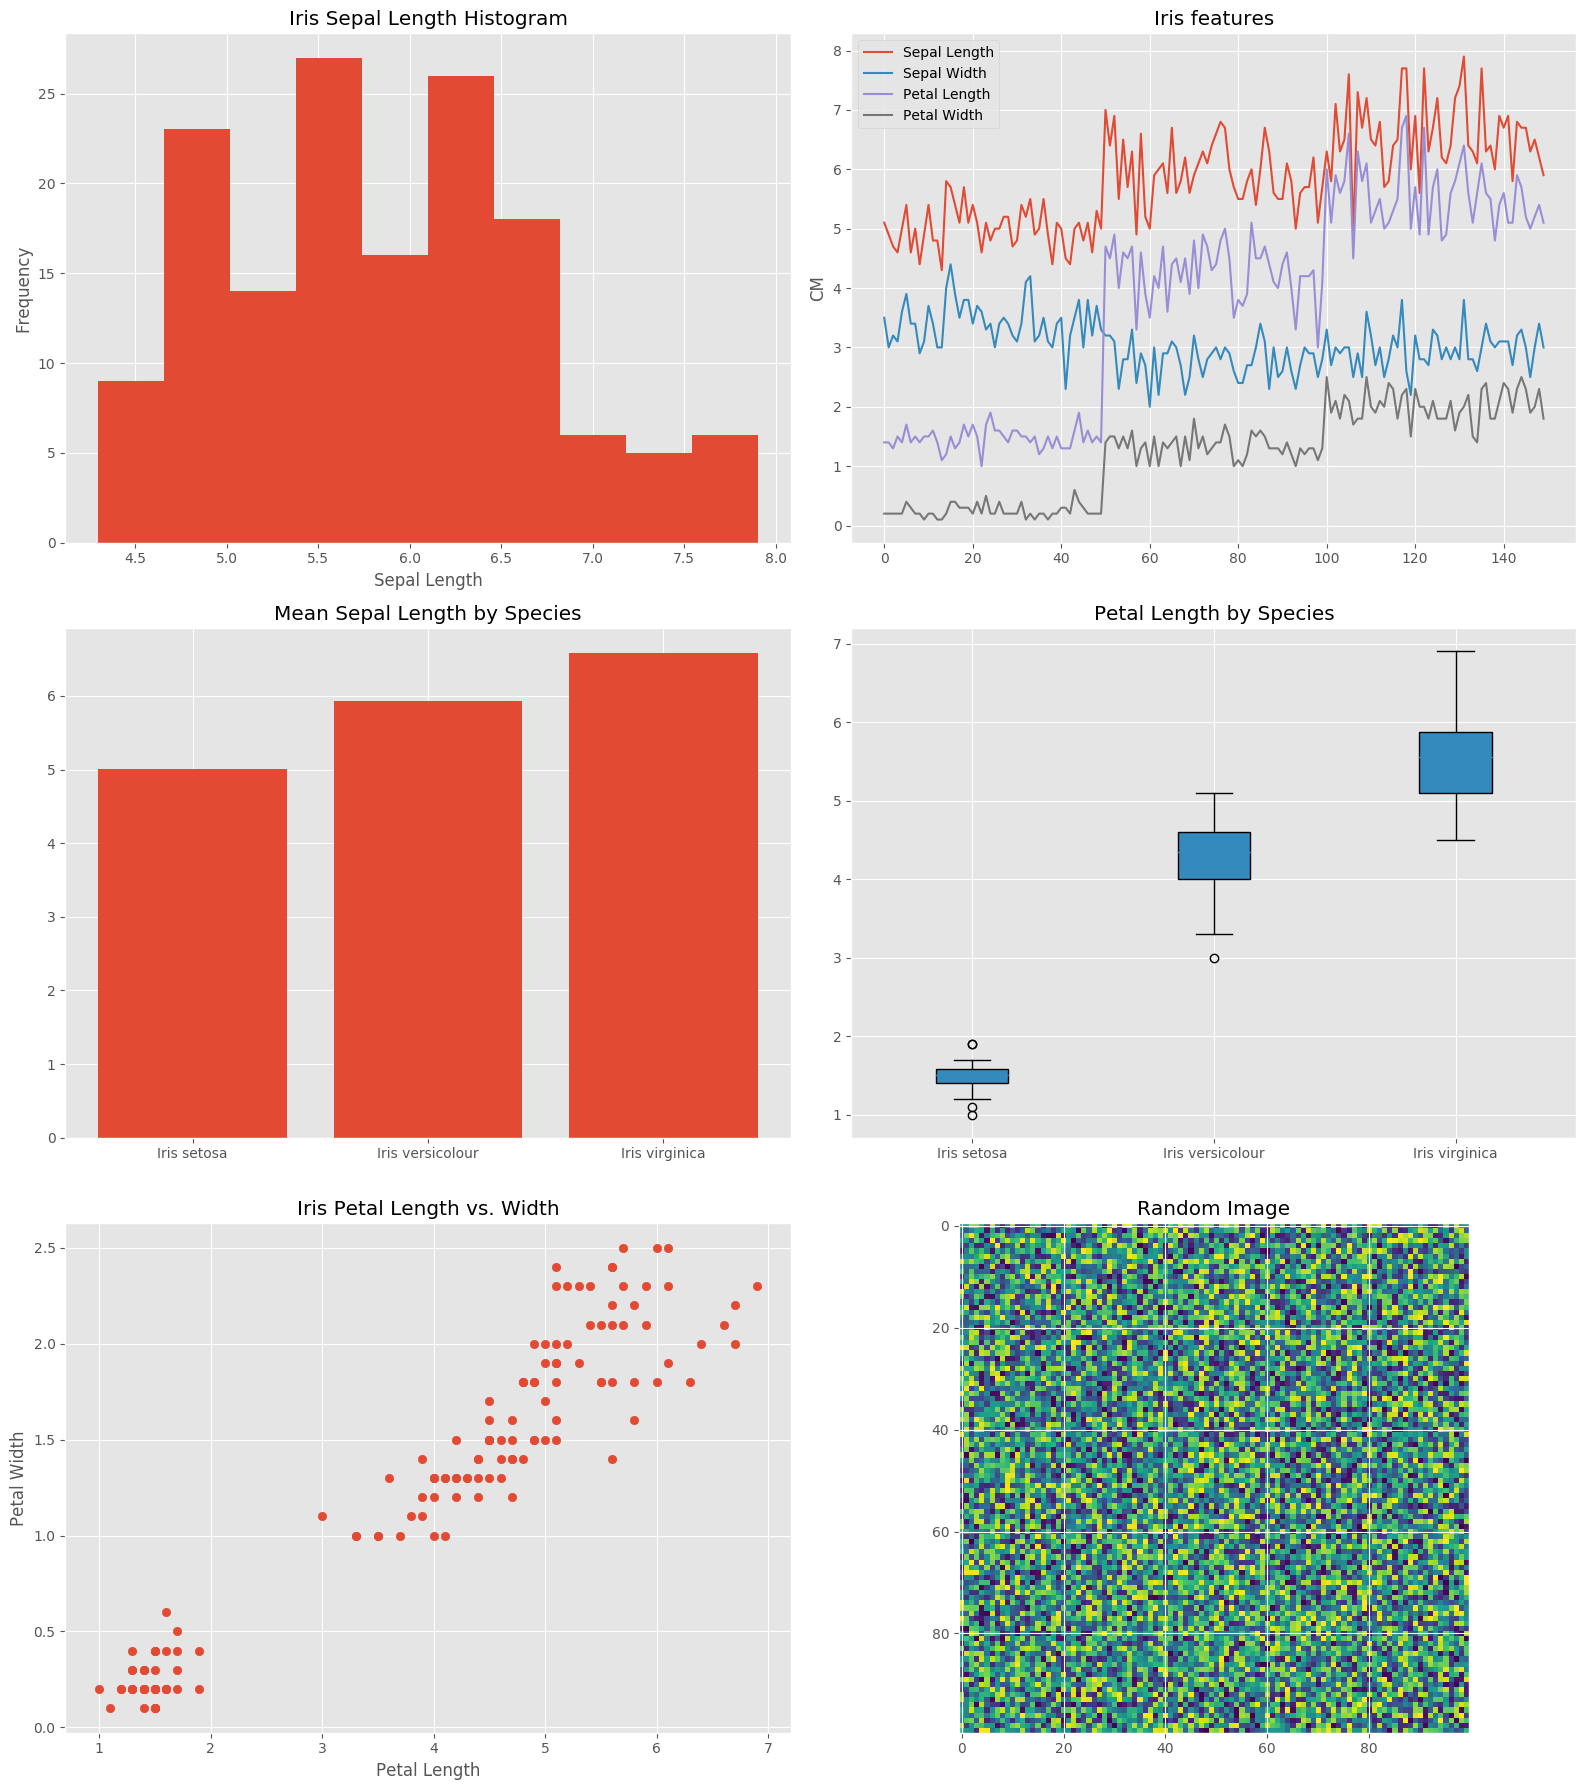

In [9]:
print( 'ggplot' )
testStyle( styleType = 'ggplot' )

fivethirtyeight


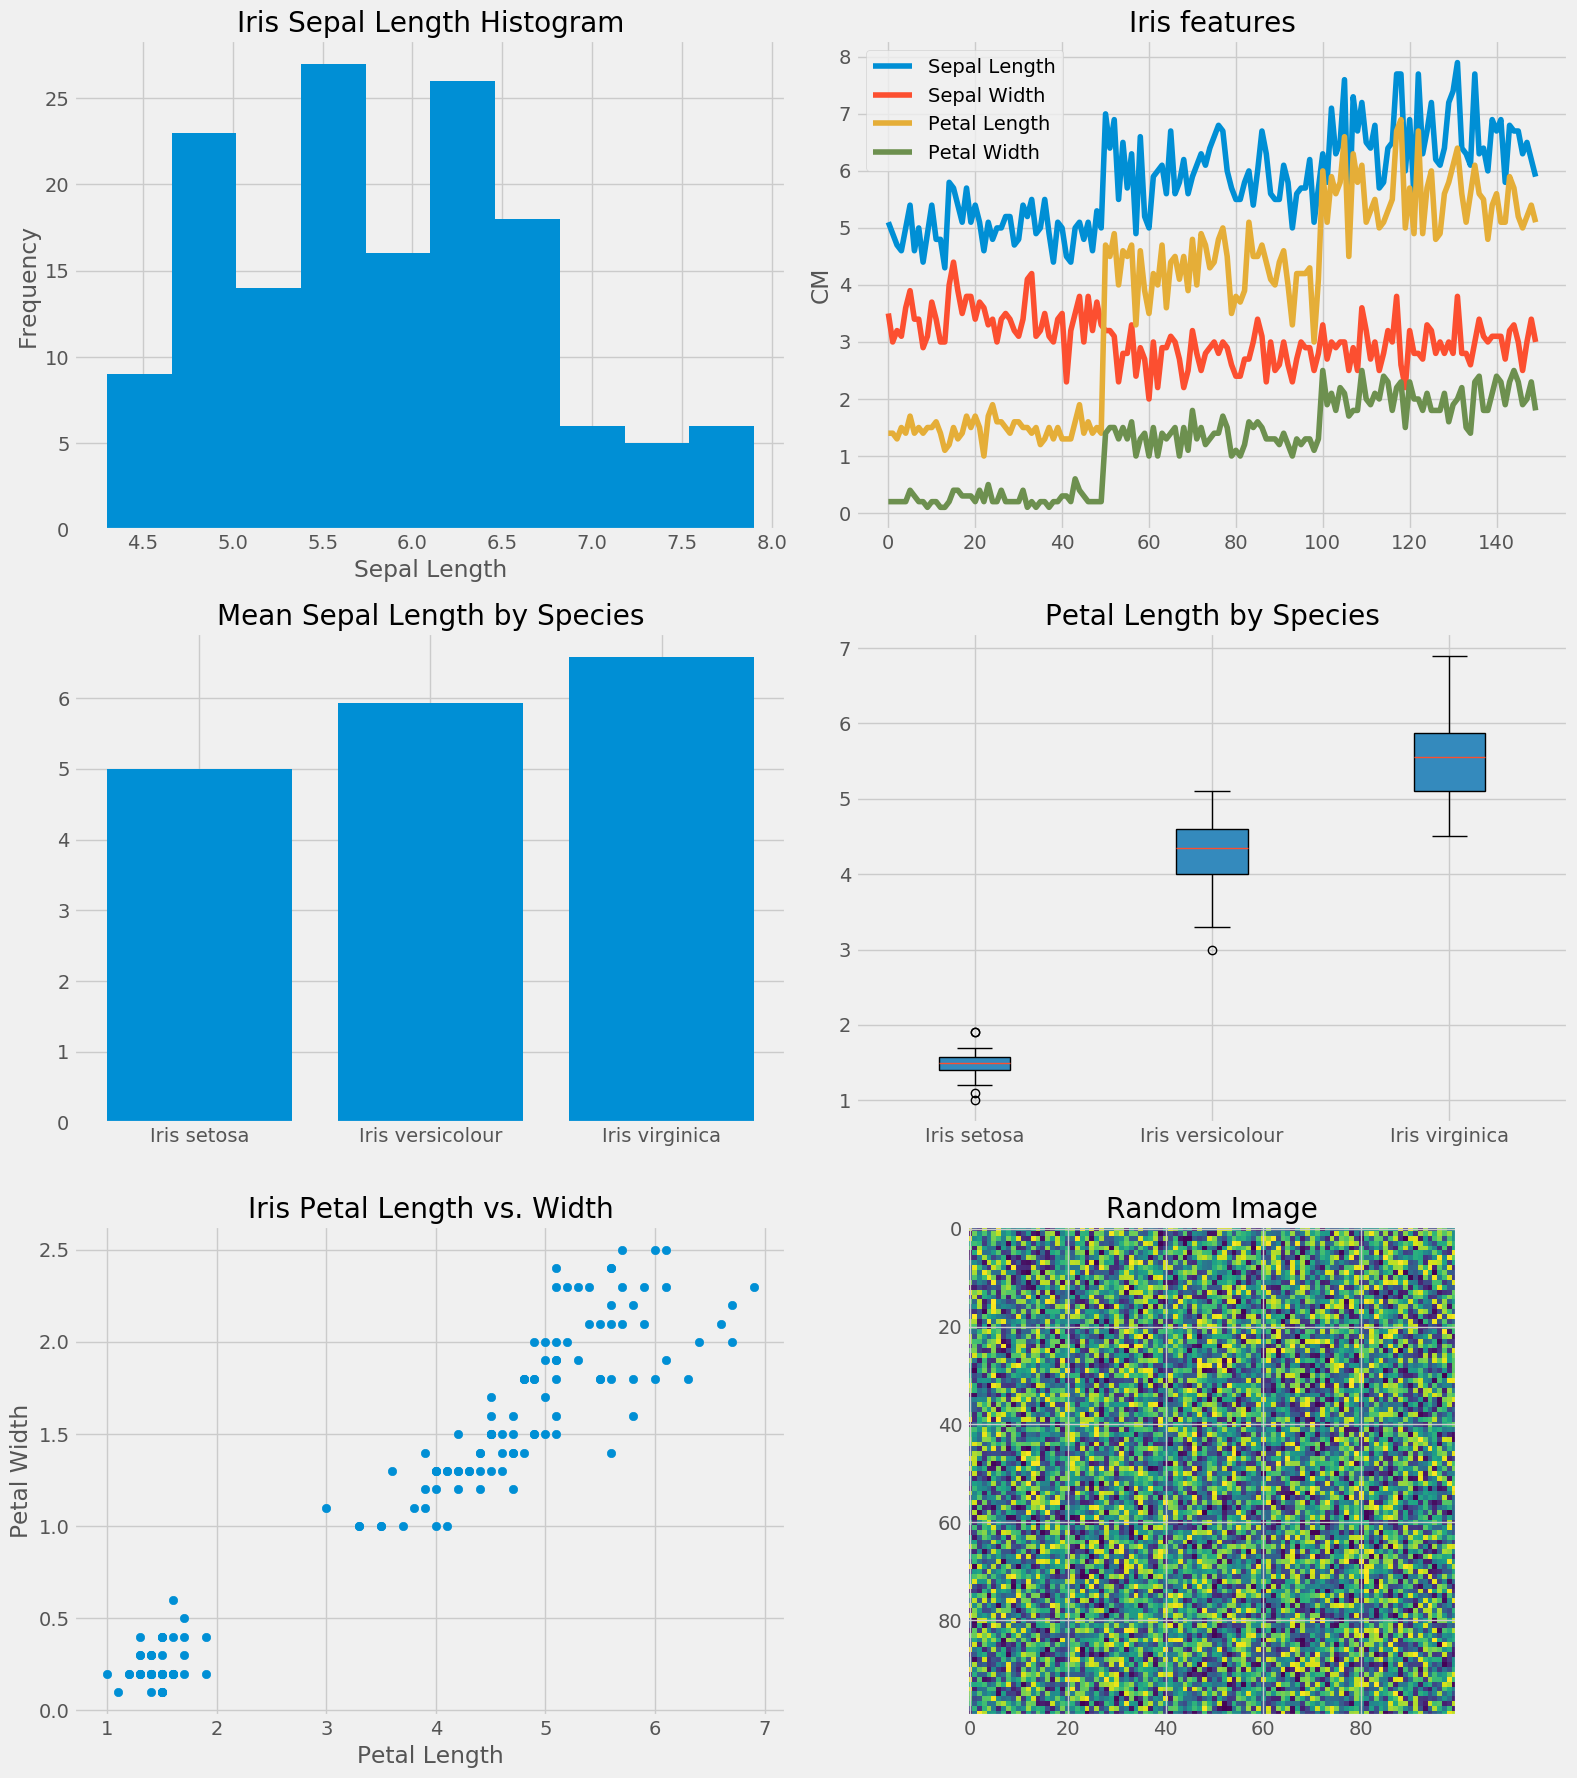

In [10]:
print( 'fivethirtyeight' )
testStyle( styleType = 'fivethirtyeight' )

### Let's make our own style by enhancing the default ggplot style

It's easier to start by finding the existing style presets. Find them in your matplotlib config folder.

In linux / mac:

    ~/.config/matplotlib
    
In Windows:

    ~/python_folder/Lib/site-packages/matplotlib/mpl-data/stylelib
    
Here's the custom style's content:

In [11]:
with open( 'ggplot_pp.mplstyle' ) as f:
    print( f.read() )

patch.linewidth: 0.75
patch.facecolor: 348ABD  # blue
patch.edgecolor: 333333
patch.antialiased: True
patch.force_edgecolor: True

font.size: 13.0
font.family: sans-serif
font.style: normal
font.sans-serif: Arial

image.cmap: gist_heat

axes.facecolor: white
axes.edgecolor: white
axes.linewidth: 1
axes.grid: True
axes.titlesize: x-large
axes.labelsize: large
axes.labelcolor: 555555
axes.axisbelow: True

axes.prop_cycle: cycler('color', ['F8766D', 'C49A00', '53B400', '00C094', '00B6EB', 'A58AFF', 'FB61D7'])
                   # E24A33 : soft red
                   # 348ABD : soft yellow
                   # 988ED5 : grass green
                   # 777777 : sea green
                   # FBC15E : blue
                   # 8EBA42 : purple
                   # FFB5B8 : pink

xtick.color: 555555
xtick.direction: out

ytick.color: 555555
ytick.direction: out

grid.color: 999999
grid.linestyle: dotted

figure.facecolor: white
figure.edgecolor: 0.50



### Anatomy of a figure
!['Anatomy of a figure'](https://matplotlib.org/_images/anatomy.png)

from: https://matplotlib.org/_images/anatomy.png

ggplot_pp.mplstyle


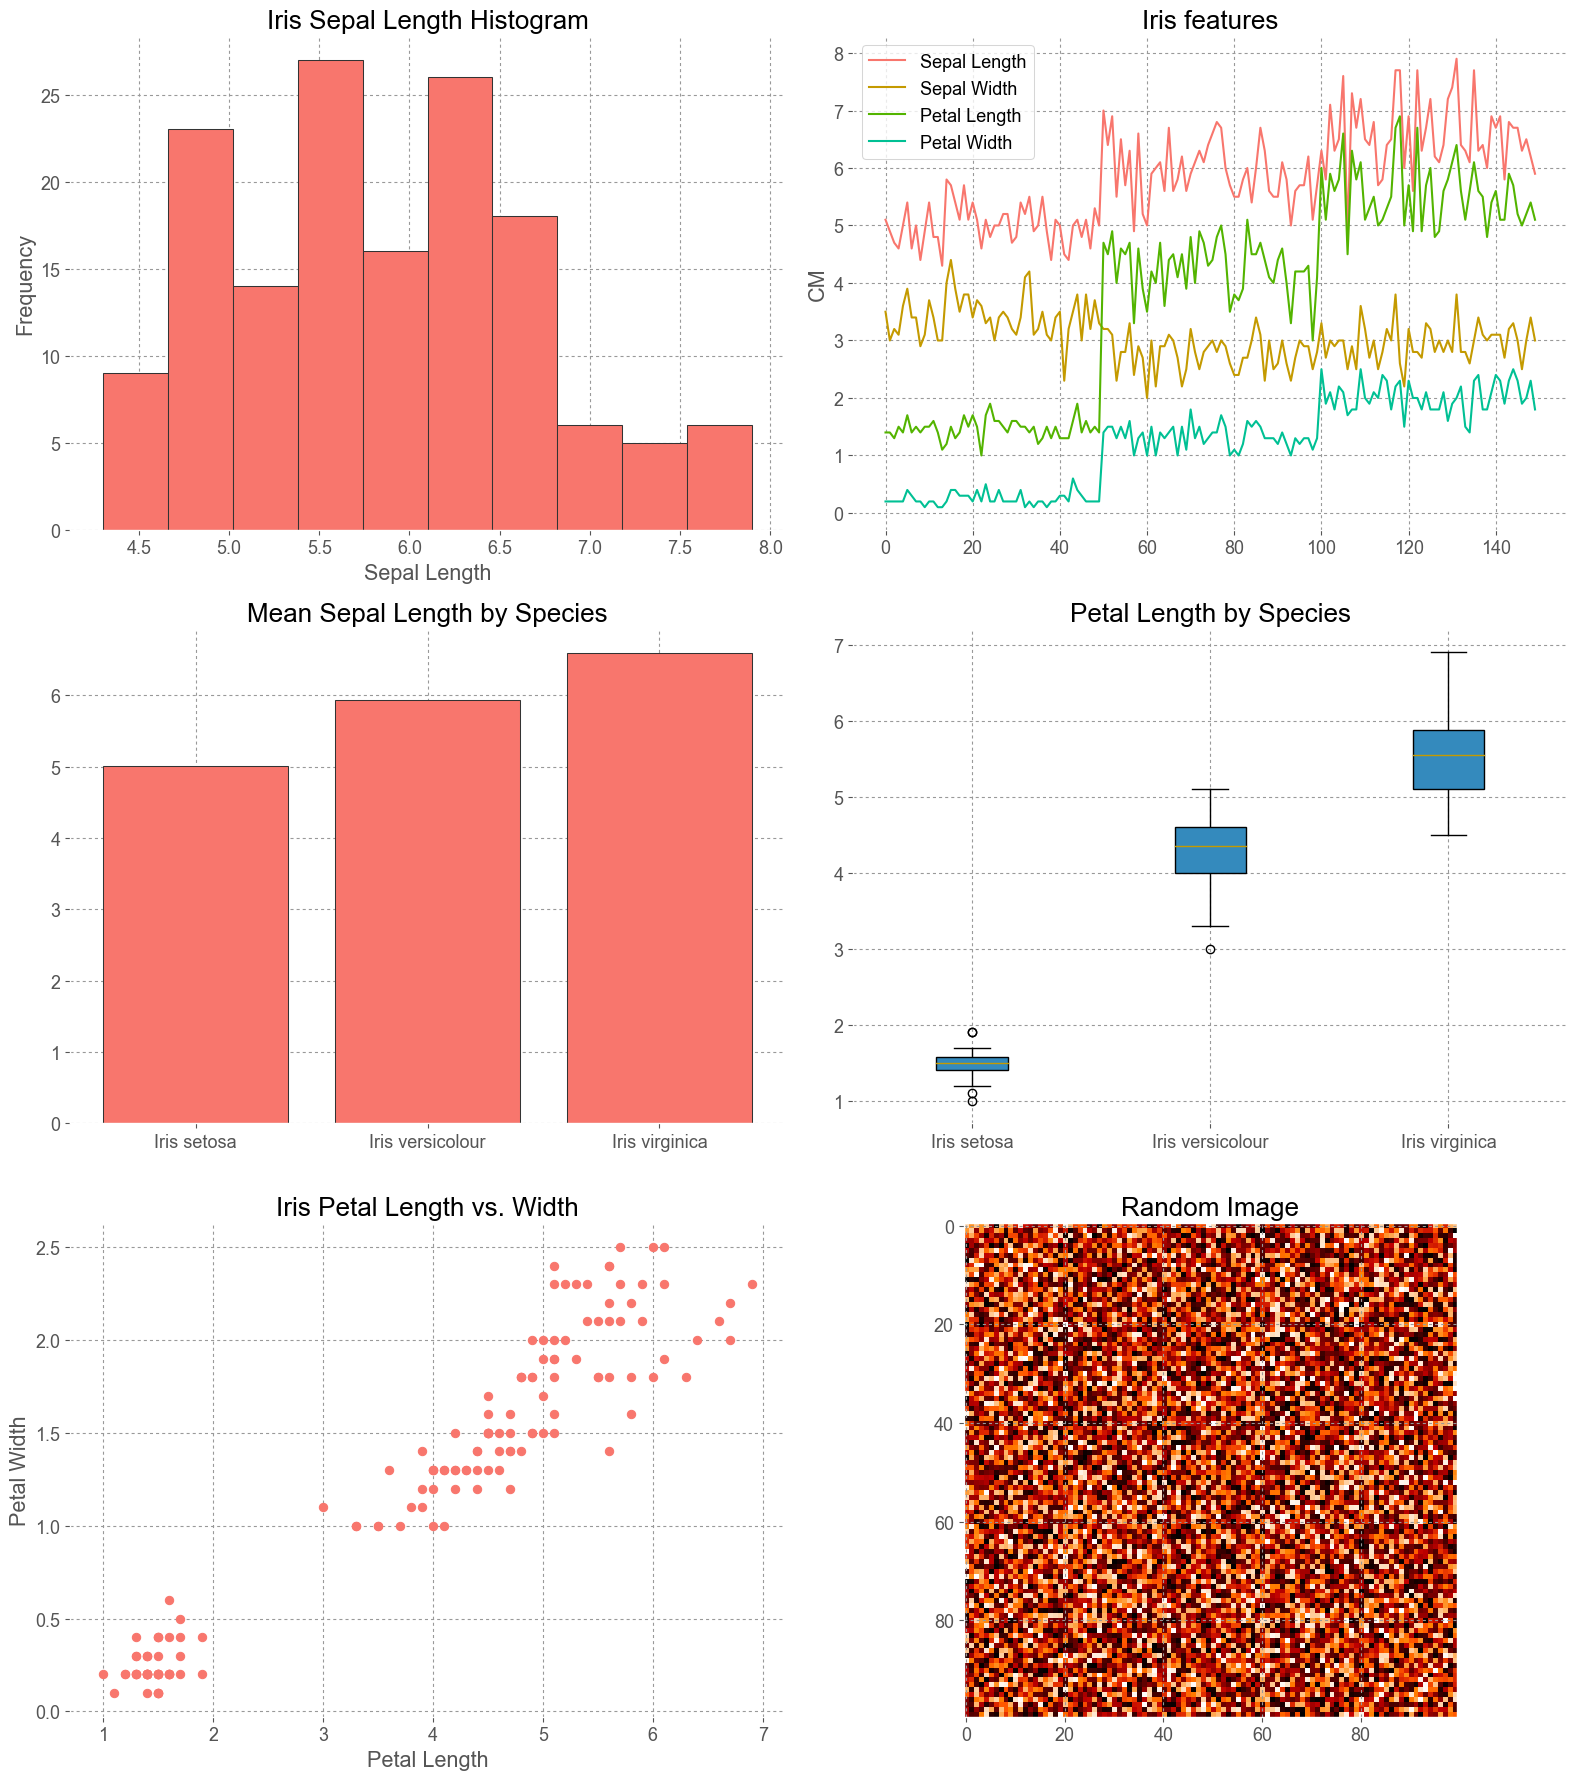

In [12]:
mpl.rcParams.update( mpl.rcParamsDefault )
print( 'ggplot_pp.mplstyle' )
testStyle( styleType = 'ggplot_pp.mplstyle', file = True )

## Further to explore:

Official custom style docs:
https://matplotlib.org/users/style_sheets.html

### The highest aspiration of any self respecting plotting nerd: XKCD

!['XKCD'](http://imgs.xkcd.com/comics/front_door.png)

Tutorial by Jake Vanderplas:
https://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib  

Offical matplotlib method:
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xkcd.html

## Using figures and axis objects

### Figures
A figure is a canvas for drawing your plots. It has a designated size (`figsize`), and can contain several subplots.
After creating a new figure, all the plots you draw will be added to this figure (until you generate a new figure, or run `plot.show()`).

### Using matplotlib.subplots()

The subplots function is a handy way to generate a figure and axes object, which gives us the ability to set the figure size explicity using the `figsize` argument. It also enables us to define the number of subplots we need, in a neat array or matrix of axis objects.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD1F65EE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DD1EC99DD8>]], dtype=object)

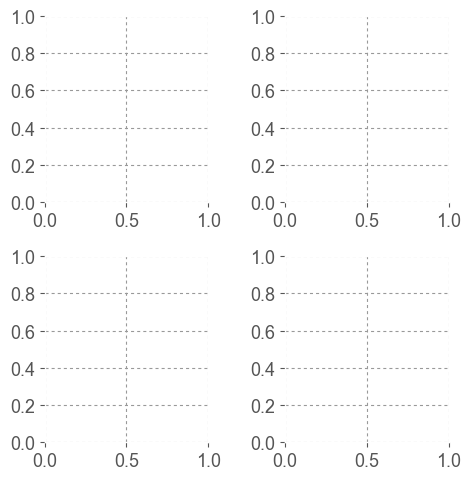

In [15]:
figure, axes = plt.subplots( 
    2,                 # 2 rows
    2,                 # 2 columns
    figsize = ( 5, 5 ) # Figure of 500 X 500 pixels
)

plt.tight_layout() # Rearrange chart, especially axis ticks' text, to fit small chart size

# Let's see what the axes object contains
axes

### When you don't care about individual plot placement, you can convert the axes matrix to a flat array

#### We'll use the Boston housing values dataset from Scikit Learn to expore this

Data Set Information:

Concerns housing values in suburbs of Boston.


Attribute Information:

    1. CRIM: per capita crime rate by town 
    2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    3. INDUS: proportion of non-retail business acres per town 
    4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    5. NOX: nitric oxides concentration (parts per 10 million) 
    6. RM: average number of rooms per dwelling 
    7. AGE: proportion of owner-occupied units built prior to 1940 
    8. DIS: weighted distances to five Boston employment centres 
    9. RAD: index of accessibility to radial highways 
    10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [19]:
# Load dataset and generate Pandas dataframe
boston = datasets.load_boston()
bostonDF = pd.DataFrame(
    data    = np.c_[ boston['data'], boston['target'] ],
    columns = list( boston['feature_names'] ) + ['MEDV']
)

bins   = np.linspace( bostonDF.RM.min(), bostonDF.RM.max(), 7 )
labels = [ round(v) for v in bins[1:] ]
bostonDF['RM.groups'] = pd.cut( bostonDF.RM, bins, labels = labels )

bostonDF['RM.groups'].value_counts().sort_index()

4.0      4
5.0     19
6.0    218
7.0    204
8.0     45
9.0     15
Name: RM.groups, dtype: int64

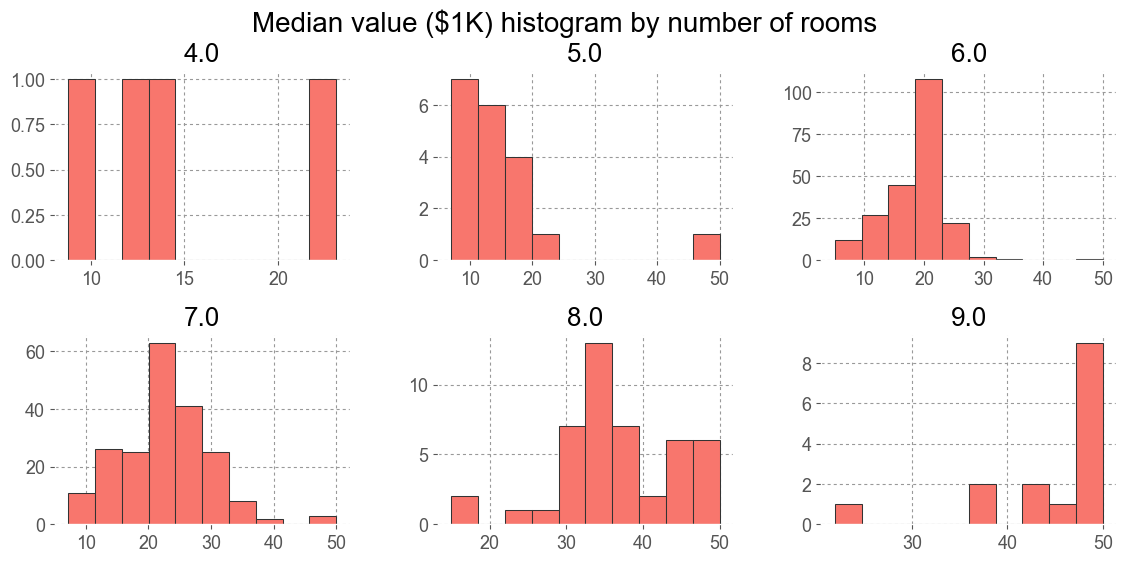

In [46]:
f, axs = plt.subplots( 2, 3, figsize = ( 12, 6 ) )

flat = axs.flat # Flatten axes matrix
for ax, rmGroup in zip( flat, labels ):
    rmGroupDF = bostonDF[ bostonDF['RM.groups'] == rmGroup ]
    ax.hist( rmGroupDF['MEDV'] )
    ax.set_title( rmGroup )

f.tight_layout( h_pad = 1, pad = 2.5 ) # Make sure we have room for our supertitle
f.suptitle( "Median value ($1K) histogram by number of rooms", fontsize = 20 )

plt.show()

## Color maps

Colormaps are sets of colors, normally used to map value to color in a predictable way.
However, some color maps are simply repositories of nice, eye pleasing color combinations that work well together.

Using a colormap is a nice way to add an additional data dimension to your plot without adding another spatial axis.

Matplotlib has several color repositories and lots of color maps for you to choose from.

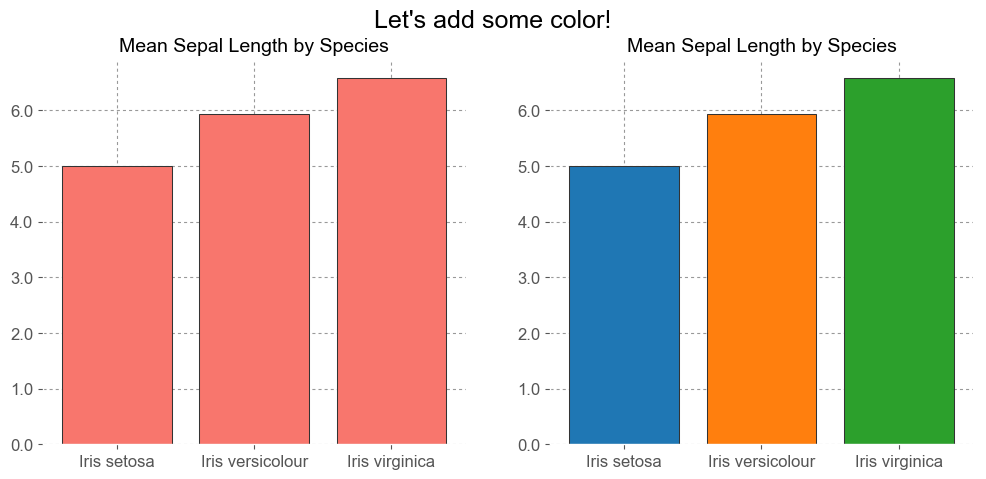

In [47]:
meanSpealLengthPerSpecies = irisDF.groupby('Species').agg({ 'SepalLength' : 'mean' })
x  = meanSpealLengthPerSpecies.index
y  = meanSpealLengthPerSpecies.SepalLength
xi = list( range( len( x ) ) )

fig, ax = plt.subplots( 1,2, figsize = (12, 5) )

for i, a in enumerate( ax ):
    if i == 0:
        a.bar( xi, y )
    else:
        # Pass a list of colors to the color argument to set a color for each value
        a.bar( xi, y, color = plt.get_cmap('Vega10').colors )

    a.set_xticks( xi )
    a.set_xticklabels( x, fontsize = 12 )
    a.set_title( "Mean Sepal Length by Species", fontsize = 14 )
    a.set_yticklabels( np.linspace(0,7,8), fontsize = 12 )

fig.suptitle( "Let's add some color!", fontsize = 18 )

plt.show()

### Color mapping labels

Although it's nice and more interesting to see color for each bar in a bar plot, it's probably much handier to use colors to visualize labelled data. ggplot2 has a built in function for coloring data by a list of labels, and all we need to reproduce this behavior is a small function that maps labels to colors via a provided color map name.

In [48]:
import matplotlib.lines as mlines

def labels_to_colors( labels, cmapName = 'Vega20', marker = 'o' ):
    """ This function accepts a list of labels and a colormap name,
    and maps each unique label to a unique color from the provided color map.
    It then retuns a legend handles and the list of colors for each label point.

    Arguments:
    labels   -- Flat array of labels
    cmapName -- Name of a matplotlib colormap to be used
    marker   -- Marker type for legend
    """
    
    uniques = list( pd.Series( labels ).unique() )
    cmap    = plt.get_cmap( cmapName )
    
    handles = [ 
        mlines.Line2D(
            [], [], 
            color      = cmap( uniques.index( ulabel ) ),
            linestyle  = '',
            marker     = marker,
            markersize = 5,
            label      = ulabel
        )
        for ulabel in uniques
    ]
    
    colors = [ cmap( uniques.index( label ) ) for label in labels ]
    return handles, colors

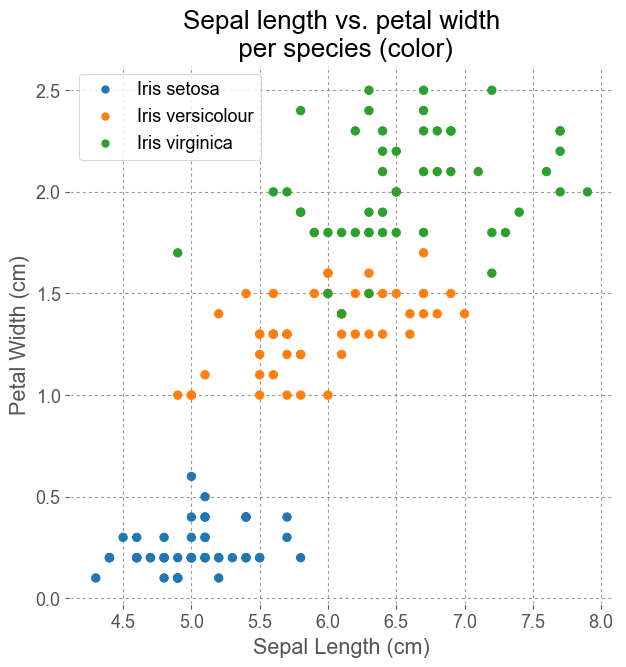

In [49]:
f, ax = plt.subplots( figsize = (7, 7) )
handles, colors = labels_to_colors( irisDF.Species, 'Vega10' )
ax.scatter( irisDF.SepalLength, irisDF.PetalWidth, color = colors )

ax.legend( handles = handles )
ax.set( 
    xlabel = 'Sepal Length (cm)', 
    ylabel = 'Petal Width (cm)', 
    title  = 'Sepal length vs. petal width\n per species (color)'
)

plt.show()

### Color mapping values

Another nice way to use colormaps is to reflect another continuous numerical dimension, rather than add another spatial axis. Again, we'll right a function that performs this behavior, which is built in in ggplot2.

In [51]:
def values_to_colors( values, cmapName = 'Spectral_r' ):
    """ This function accepts a list of values and a colormap name, and returns a list of colors
    from the color map, matching the normalized values provided.

    Arguments:
    values   -- Flat array of values
    cmapName -- Name of a matplotlib colormap to be used
    """

    # Normalize values list
    a = np.array( values )
    norm = ( a - a.min() ) / ( a.max() - a.min() )

    # Make sure provided colormap name exists, otherwise fallback to Spectral
    if cmapName not in plt.colormaps():
        cmapName = 'Spectral_r'
        
    cmap = plt.get_cmap( cmapName )
    
    # Calculate colors via colormap and return them
    return [ cmap( v ) for v in norm ]

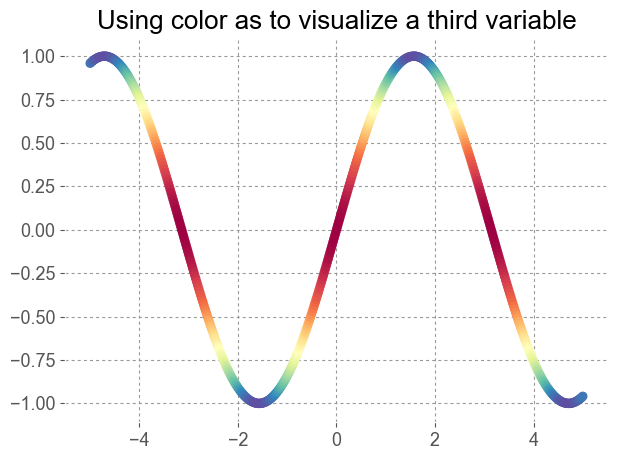

In [52]:
x = np.linspace(-5,5,500)
y = np.sin( x )
z = np.cos( y )

f, ax = plt.subplots( figsize = (7, 5) )
ax.scatter( x, y, color = values_to_colors( z ) )

ax.set_title("Using color as to visualize a third variable")

plt.show()

## Interactivity in Jupyter with ipywidgets interact

In addition to plotting spicy charts, notebooks can become even nicer and more useful with a few basic interactive controls.

To make anything interactive in Jupyter, we simply need to wrap our to-be-interactive functionality in a dedicated function. We can then call the `interact` method or the `@interact` decorator to make in interactive.

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

from scipy.stats import norm

In [ ]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def interactive_normal_dist( mu = 0, sig = 1.0 ):
    f, ax = plt.subplots( figsize = (7, 5 ) )
    ax.plot( gaussian( np.linspace(-5, 5, 120), mu, sig ) )

    plt.show()

interact( interactive_normal_dist, mu = (-5, 5, 0.1), sig = (-5,5, 0.1) )

## More to explore: Advanced interactivity with plotly and bokeh

### Plotly
Python library and API for generating and hosting interactive plots.

https://plot.ly/python/

Accepts matplotlib objects for direct plotting:

https://plot.ly/matplotlib/
    
### Bokeh
Similar concept, created by Continuum - the awesome makers of Anaconda.

http://bokeh.pydata.org/en/latest/docs/gallery.html   
